In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8765 - loss: 0.4170 - val_accuracy: 0.9619 - val_loss: 0.1195
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9700 - loss: 0.1033 - val_accuracy: 0.9723 - val_loss: 0.0872
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9790 - loss: 0.0671 - val_accuracy: 0.9722 - val_loss: 0.0868
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0505 - val_accuracy: 0.9775 - val_loss: 0.0700
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9876 - loss: 0.0401 - val_accuracy: 0.9729 - val_loss: 0.0883
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy: 0.9732 - val_loss: 0.0881
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9926 - loss: 0.0248 - val_accuracy: 0.9801 - val_loss: 0.0737
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9922 - loss: 0.024

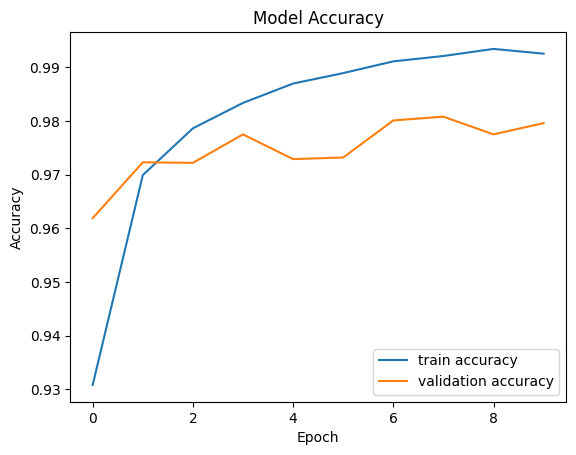

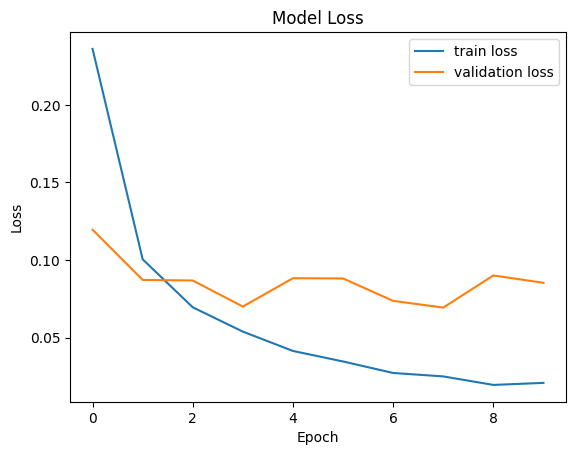

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0973
Test accuracy: 0.9796000123023987


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 생성
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

In [1]:
# 코사인 유사도에 의한 추천 시스템
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 사용자 벡터 정의 (Kim의 다섯 번째, 여섯 번째 값은 0으로 초기화)
kim = np.array([5, 1, 4, 4, 0, 0])
lee = np.array([3, 1, 2, 2, 3, 2])
park = np.array([4, 2, 4, 5, 5, 1])
choi = np.array([3, 3, 1, 5, 4, 3])
kwon = np.array([1, 5, 5, 2, 1, 4])

# 모든 사용자 벡터를 모아서 행렬로 만듦
users = np.array([kim, lee, park, choi, kwon])

# Kim과 다른 사용자 간의 코사인 유사도 계산
cos_sim = cosine_similarity(users)[0, 1:]

# 각 항목의 값을 유사도로 가중 평균하여 예측
def predict_missing_value(kim, others, cos_sim):
    predictions = []
    for i in range(len(kim)):
        if kim[i] == 0:  # 값이 비어 있는 항목에 대해서만 예측
            weighted_sum = np.sum(others[:, i] * cos_sim)
            sum_of_weights = np.sum(cos_sim)
            prediction = weighted_sum / sum_of_weights if sum_of_weights != 0 else 0
            predictions.append(prediction)
        else:
            predictions.append(kim[i])
    return predictions

# 다른 사용자의 벡터 모음 (Kim 제외)
other_users = users[1:]

# Kim의 빈 값을 예측
kim_filled = predict_missing_value(kim, other_users, cos_sim)

# Kim의 다섯 번째와 여섯 번째 값에 대한 레이블 결정
fifth_value = kim_filled[4]
sixth_value = kim_filled[5]

if fifth_value > sixth_value:
    label = "E"
else:
    label = "F"

# 결과 출력
print(f"Kim의 다섯 번째 값: {fifth_value}")
print(f"Kim의 여섯 번째 값: {sixth_value}")
print(f"추천: {label}")

Kim의 다섯 번째 값: 3.39702127399391
Kim의 여섯 번째 값: 2.3625384640129212
추천: E


In [2]:
# KNN(최근접이웃) 에 의한 추천 시스템
import numpy as np
from sklearn.impute import KNNImputer

# 사용자 벡터 정의 (Kim의 다섯 번째, 여섯 번째 값은 결측값으로 처리)
kim = np.array([5, 1, 4, 4, np.nan, np.nan])
lee = np.array([3, 1, 2, 2, 3, 2])
park = np.array([4, 2, 4, 5, 5, 1])
choi = np.array([3, 3, 1, 5, 4, 3])
kwon = np.array([1, 5, 5, 2, 1, 4])

# 모든 사용자 벡터를 모아서 행렬로 만듦
users = np.array([kim, lee, park, choi, kwon])

# KNNImputer를 사용해 결측값 채우기
knn_imputer = KNNImputer(n_neighbors=2, weights='uniform')  # 가까운 2명의 이웃을 사용
users_filled = knn_imputer.fit_transform(users)

# Kim의 채워진 벡터 확인
kim_filled = users_filled[0]

# Kim의 다섯 번째와 여섯 번째 값에 대한 레이블 결정
fifth_value = kim_filled[4]
sixth_value = kim_filled[5]

if fifth_value > sixth_value:
    label = "E"
else:
    label = "F"

# 결과 출력
print(f"Kim의 다섯 번째 값: {fifth_value}")
print(f"Kim의 여섯 번째 값: {sixth_value}")
print(f"추천: {label}")

Kim의 다섯 번째 값: 4.0
Kim의 여섯 번째 값: 1.5
추천: E


In [2]:
# 데이터 로딩
import pandas as pd

# 텍스트 파일을 읽어옵니다.
file_path = 'kim.txt'  # 파일 경로 설정

# 파일을 읽고 데이터를 리스트로 변환합니다.
data = []
with open(file_path, 'r') as file:
    for line in file:
        elements = line.strip().split(',')
        if len(elements) == 3:  # Check if there are three elements (user, item, rating)
            user, item, rating = elements
            try:
                data.append([user, item, int(rating)])
            except ValueError:
                print(f"Invalid rating value for line: {line.strip()}")  # Handle invalid ratings
        else:
            print(f"Skipping line: {line.strip()}")  # Handle lines with missing elements

# 리스트를 데이터프레임으로 변환합니다.
df = pd.DataFrame(data, columns=['User', 'Item', 'Rating'])

# 결과 출력
print(df)

Invalid rating value for line: kim,E,
Invalid rating value for line: kim,F,
    User Item  Rating
0   ﻿kim    A       5
1    kim    B       1
2    kim    C       4
3    kim    D       4
4    lee    A       3
5    lee    B       1
6    lee    C       2
7    lee    D       2
8    lee    E       3
9    lee    F       2
10  park    A       4
11  park    B       2
12  park    C       4
13  park    D       5
14  park    E       5
15  park    F       1
16  choi    A       3
17  choi    B       3
18  choi    C       1
19  choi    D       5
20  choi    E       4
21  choi    F       3
22  kwon    A       1
23  kwon    B       5
24  kwon    C       5
25  kwon    D       2
26  kwon    E       1
27  kwon    F       4


In [3]:
# 여러 중복 레코드를 통합하여 데이터 프레임으로 구성
import pandas as pd

# 파일 경로 설정 (kim.txt 파일이 있는 위치)
file_path = 'kim.txt'

# 데이터를 읽어오기
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(',')
        data.append(parts)

# 데이터프레임으로 변환
columns = ['User'] + list('ABCDEF')
df = pd.DataFrame(data, columns=['User', 'Item', 'Rating'])
df = df.pivot(index='User', columns='Item', values='Rating').reset_index()

# 결과 출력
print(df)

# 결측값을 NaN으로 변환하고, 정렬
df.replace('', pd.NA, inplace=True)
df = df.reindex(columns=columns)
df.set_index('User', inplace=True)

# DataFrame 출력
print(df)


Item  User    A    B    C    D    E    F
0     choi    3    3    1    5    4    3
1      kim  NaN    1    4    4          
2     kwon    1    5    5    2    1    4
3      lee    3    1    2    2    3    2
4     park    4    2    4    5    5    1
5     ﻿kim    5  NaN  NaN  NaN  NaN  NaN
Item    A    B    C    D     E     F
User                                
choi    3    3    1    5     4     3
kim   NaN    1    4    4  <NA>  <NA>
kwon    1    5    5    2     1     4
lee     3    1    2    2     3     2
park    4    2    4    5     5     1
﻿kim    5  NaN  NaN  NaN   NaN   NaN


In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 사용자 데이터
data = {
    'A': [5, 3, 4, 3, 1],
    'B': [1, 1, 2, 3, 5],
    'C': [4, 2, 4, 1, 5],
    'D': [4, 2, 5, 5, 2],
    'E': [np.nan, 3, 5, 4, 1],
    'F': [np.nan, 2, 2, 3, 4]
}

users = ['kim', 'lee', 'park', 'choi', 'kwon']

# 데이터프레임 생성
df = pd.DataFrame(data, index=users)

# 결측값을 각 열의 평균으로 채우기
df_filled = df.apply(lambda col: col.fillna(col.mean()), axis=0)

# 코사인 유사도 계산
cos_sim = cosine_similarity(df_filled)

# 코사인 유사도를 데이터프레임으로 변환하여 사용자별 유사도 값 추가
cos_sim_df = pd.DataFrame(cos_sim, index=users, columns=users)

# 사용자별로 kim과의 코사인 유사도 값 추출
cos_sim_with_kim = cos_sim_df['kim']

# 원래 데이터프레임에 코사인 유사도 값 추가
df['코사인 유사도'] = cos_sim_with_kim

# 결과 출력
print(df)

"""
1. 데이터 준비: Kim, Lee, Park, Choi, Kwon의 아이템 A, B, C, D, E, F에 대한 평점 데이터를 정의합니다. 일부 값은 결측값(NaN)으로 표시됩니다.
2. 결측값 처리: 결측값을 각 열의 평균으로 채웁니다. 이 작업은 코사인 유사도를 계산하기 위해 필요합니다.
3. 코사인 유사도 계산: cosine_similarity 함수를 사용해 각 사용자 간의 유사도를 계산합니다.
4. 코사인 유사도 추가: Kim 사용자와 다른 사용자 간의 코사인 유사도 값을 추출하고, 이를 데이터프레임에 새 열로 추가합니다.
5. 결과 출력: 최종 데이터프레임을 출력하여 각 사용자별 코사인 유사도를 확인할 수 있습니다.

결과
       A  B  C  D    E    F  코사인 유사도
kim    5  1  4  4  NaN  NaN  1.000000
lee    3  1  2  2  3.0  2.0  0.990375
park   4  2  4  5  5.0  1.0  0.975100
choi   3  3  1  5  4.0  3.0  0.831398
kwon   1  5  5  2  1.0  4.0  0.672804
"""

      A  B  C  D    E    F   코사인 유사도
kim   5  1  4  4  NaN  NaN  1.000000
lee   3  1  2  2  3.0  2.0  0.972652
park  4  2  4  5  5.0  2.0  0.963487
choi  3  3  1  5  4.0  3.0  0.872715
kwon  1  5  5  2  1.0  4.0  0.705759


'\n1. 데이터 준비: Kim, Lee, Park, Choi, Kwon의 아이템 A, B, C, D, E, F에 대한 평점 데이터를 정의합니다. 일부 값은 결측값(NaN)으로 표시됩니다.\n2. 결측값 처리: 결측값을 각 열의 평균으로 채웁니다. 이 작업은 코사인 유사도를 계산하기 위해 필요합니다.\n3. 코사인 유사도 계산: cosine_similarity 함수를 사용해 각 사용자 간의 유사도를 계산합니다.\n4. 코사인 유사도 추가: Kim 사용자와 다른 사용자 간의 코사인 유사도 값을 추출하고, 이를 데이터프레임에 새 열로 추가합니다.\n5. 결과 출력: 최종 데이터프레임을 출력하여 각 사용자별 코사인 유사도를 확인할 수 있습니다.\n\n결과\n       A  B  C  D    E    F  코사인 유사도\nkim    5  1  4  4  NaN  NaN  1.000000\nlee    3  1  2  2  3.0  2.0  0.990375\npark   4  2  4  5  5.0  1.0  0.975100\nchoi   3  3  1  5  4.0  3.0  0.831398\nkwon   1  5  5  2  1.0  4.0  0.672804\n'

In [8]:
# 코사인 유사도 계산
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 텍스트 파일 로딩
df = pd.read_csv('kim.txt', header=None, names=['User', 'Item', 'Rating'])

# 피벗 테이블로 변환하여 사용자-항목 행렬 생성
df_pivot = df.pivot(index='User', columns='Item', values='Rating')

# 결측값을 각 열의 평균으로 채우기
df_filled = df_pivot.apply(lambda col: col.fillna(col.mean()), axis=0)

# 코사인 유사도 계산
cos_sim = cosine_similarity(df_filled)

# 코사인 유사도를 데이터프레임으로 변환하여 사용자별 유사도 값 추가
cos_sim_df = pd.DataFrame(cos_sim, index=df_filled.index, columns=df_filled.index)

# 사용자별로 'kim'과의 코사인 유사도 값 추출
cos_sim_with_kim = cos_sim_df['kim']

# 원래 데이터프레임에 코사인 유사도 값 추가
df_filled['코사인 유사도'] = cos_sim_with_kim

# 결과 출력
print(df_filled)



Item    A    B    C    D     E    F   코사인 유사도
User                                         
choi  3.0  3.0  1.0  5.0  4.00  3.0  0.869898
kim   5.0  1.0  4.0  4.0  3.25  2.5  1.000000
kwon  1.0  5.0  5.0  2.0  1.00  4.0  0.698298
lee   3.0  1.0  2.0  2.0  3.00  2.0  0.970764
park  4.0  2.0  4.0  5.0  5.00  1.0  0.951331


데이터프레임 인덱스:
Index(['choi', 'kim', 'kwon', 'lee', 'park', '﻿kim'], dtype='object', name='User')
코사인 유사도 행렬:
          choi       kim      kwon       lee      park      ﻿kim
choi  1.000000  0.887046  0.695193  0.908121  0.903470  0.914416
kim   0.887046  1.000000  0.752029  0.958361  0.962215  0.957357
kwon  0.695193  0.752029  1.000000  0.698501  0.669653  0.748771
lee   0.908121  0.958361  0.698501  1.000000  0.943530  0.976738
park  0.903470  0.962215  0.669653  0.943530  1.000000  0.947522
﻿kim  0.914416  0.957357  0.748771  0.976738  0.947522  1.000000

Kim의 KNN 이웃 인덱스와 거리:
이웃 1: 사용자 'kim' (거리: 1.1102230246251565e-16)
이웃 2: 사용자 'park' (거리: 0.03778535622203483)

E 예측에 사용된 'kim'의 평점: 3.25 (유사도: 0.9999999999999999)

E 예측에 사용된 'park'의 평점: 5.0 (유사도: 0.9622146437779652)
E의 예측 값: 4.108150575907117

F 예측에 사용된 'kim'의 평점: 2.5 (유사도: 0.9999999999999999)

F 예측에 사용된 'park'의 평점: 1.0 (유사도: 0.9622146437779652)
F의 예측 값: 1.7644423635081854


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


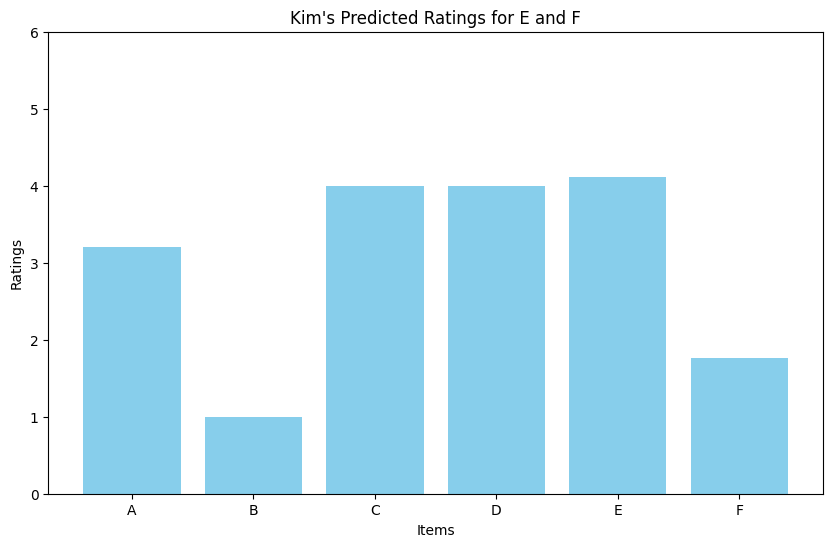

In [9]:
# KNN 에 의한 kim의 E, F 평점 예측
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 1. 파일 읽기 및 데이터 로딩
file_path = 'kim.txt'
data = []

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(',')
        user, item, rating = parts[0], parts[1], parts[2]
        if rating == '':
            rating = np.nan
        else:
            rating = float(rating)
        data.append((user, item, rating))

# 데이터프레임으로 변환
df = pd.DataFrame(data, columns=['User', 'Item', 'Rating'])
df_pivot = df.pivot(index='User', columns='Item', values='Rating')

# 데이터프레임 인덱스 확인
print("데이터프레임 인덱스:")
print(df_pivot.index)

# 2. 결측값을 각 열의 평균으로 채우기
df_filled = df_pivot.apply(lambda col: col.fillna(col.mean()), axis=0)

# 3. 코사인 유사도 계산
cos_sim = cosine_similarity(df_filled)

# 코사인 유사도 행렬 출력
users = df_pivot.index.tolist()
cos_sim_df = pd.DataFrame(cos_sim, index=users, columns=users)
print("코사인 유사도 행렬:")
print(cos_sim_df)

# 4. KNN 설정
k = 2  # K값 설정 (예시로 2 설정)
neigh = NearestNeighbors(n_neighbors=k, metric='cosine')
neigh.fit(df_filled)

# Kim의 인덱스 확인
if 'Kim' in df_filled.index:
    kim_index = 'Kim'
elif 'kim' in df_filled.index:
    kim_index = 'kim'
else:
    raise KeyError("'Kim' 또는 'kim'이라는 인덱스가 존재하지 않습니다.")

# Kim의 이웃 찾기 (사용자 인덱스 0)
distances, indices = neigh.kneighbors([df_filled.loc[kim_index]])

# Kim의 이웃 인덱스 추출 및 거리 출력
print("\nKim의 KNN 이웃 인덱스와 거리:")
for i, index in enumerate(indices[0]):
    print(f"이웃 {i+1}: 사용자 '{users[index]}' (거리: {distances[0][i]})")

# 5. 결측값에 대한 가중 평균 계산
recommendations = {}
for item in ['E', 'F']:
    item_index = df_filled.columns.get_loc(item)
    weighted_sum = 0
    similarity_sum = 0
    for neighbor_index in indices[0]:
        if not np.isnan(df_filled.iloc[neighbor_index, item_index]):
            similarity = 1 - distances[0][indices[0].tolist().index(neighbor_index)]  # 코사인 거리 -> 유사도로 변환
            rating = df_filled.iloc[neighbor_index, item_index]
            weighted_sum += similarity * rating
            similarity_sum += similarity
            print(f"\n{item} 예측에 사용된 '{users[neighbor_index]}'의 평점: {rating} (유사도: {similarity})")
    if similarity_sum != 0:
        recommendations[item] = weighted_sum / similarity_sum
        print(f"{item}의 예측 값: {recommendations[item]}")

# 6. 결과 그래프
labels = ['A', 'B', 'C', 'D', 'E', 'F']
kim_values = [
    df_filled.loc[kim_index, 'A'],
    df_filled.loc[kim_index, 'B'],
    df_filled.loc[kim_index, 'C'],
    df_filled.loc[kim_index, 'D'],
    recommendations.get('E', np.nan),
    recommendations.get('F', np.nan)
]

plt.figure(figsize=(10, 6))
plt.bar(labels, kim_values, color='skyblue')
plt.title("Kim's Predicted Ratings for E and F")
plt.xlabel("Items")
plt.ylabel("Ratings")
plt.ylim(0, 6)
plt.show()


In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

# 1. 파일 읽기 및 데이터 로딩
file_path = 'kim.txt'
data = []

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(',')
        user, item, rating = parts[0], parts[1], parts[2]
        if rating == '':
            rating = np.nan
        else:
            rating = float(rating)
        data.append((user, item, rating))

# 데이터프레임으로 변환
df = pd.DataFrame(data, columns=['User', 'Item', 'Rating'])
df_pivot = df.pivot(index='User', columns='Item', values='Rating')

# 결측값을 각 열의 평균으로 채우기
df_filled = df_pivot.apply(lambda col: col.fillna(col.mean()), axis=0)

# 코사인 유사도 계산
cos_sim = cosine_similarity(df_filled)
cos_sim_df = pd.DataFrame(cos_sim, index=df_filled.index, columns=df_filled.index)

# KNN 설정
k = 2
neigh = NearestNeighbors(n_neighbors=k, metric='cosine')
neigh.fit(df_filled)
distances, indices = neigh.kneighbors(df_filled)

# Kim에게 추천 계산 (사용자 인덱스 0)
kim_index = df_filled.index.get_loc('kim')
neighbors_indices = indices[kim_index]

# 결측값에 대한 가중 평균 계산
recommendations = {}
for item in df_filled.columns:
    if pd.isna(df_filled.loc['kim', item]):  # 결측값이 있는 항목만 추천
        item_index = df_filled.columns.get_loc(item)
        weighted_sum = 0
        similarity_sum = 0
        for neighbor_index in neighbors_indices:
            if not pd.isna(df_filled.iloc[neighbor_index, item_index]):
                similarity = 1 - distances[kim_index][list(indices[kim_index]).index(neighbor_index)]  # 코사인 거리 -> 유사도로 변환
                rating = df_filled.iloc[neighbor_index, item_index]
                weighted_sum += similarity * rating
                similarity_sum += similarity
        if similarity_sum != 0:
            recommendations[item] = weighted_sum / similarity_sum

# 실제 값과 추천 값이 모두 NaN일 경우를 방지
true_values = [df_pivot.loc['kim', 'E'], df_pivot.loc['kim', 'F']]
pred_values = [recommendations.get('E', np.nan), recommendations.get('F', np.nan)]

# 실제 값과 추천 값이 모두 NaN일 경우, MSE와 RMSE 계산이 불가능하므로 예외 처리
if not pd.isna(true_values).all() and not pd.isna(pred_values).all():
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)
else:
    mse = rmse = np.nan

# 결과 출력
print("코사인 유사도 매트릭스:")
print(cos_sim_df)

print("\nKim에 대한 추천:")
if recommendations:
    for item, recommendation in recommendations.items():
        print(f"Item {item}: {recommendation:.2f}")
    best_item = max(recommendations, key=recommendations.get)
    best_value = recommendations[best_item]
    print(f"\n가장 추천할 항목: Item {best_item} (추천 값: {best_value:.2f})")
else:
    print("추천할 항목이 없습니다.")

print(f"\nMSE: {mse:.2f}, RMSE: {rmse:.2f}")


코사인 유사도 매트릭스:
User      choi       kim      kwon       lee      park      ﻿kim
User                                                            
choi  1.000000  0.887046  0.695193  0.908121  0.903470  0.914416
kim   0.887046  1.000000  0.752029  0.958361  0.962215  0.957357
kwon  0.695193  0.752029  1.000000  0.698501  0.669653  0.748771
lee   0.908121  0.958361  0.698501  1.000000  0.943530  0.976738
park  0.903470  0.962215  0.669653  0.943530  1.000000  0.947522
﻿kim  0.914416  0.957357  0.748771  0.976738  0.947522  1.000000

Kim에 대한 추천:
추천할 항목이 없습니다.

MSE: nan, RMSE: nan


코사인 유사도 매트릭스:
User      choi       kim      kwon       lee      park      ﻿kim
User                                                            
choi  1.000000  0.887046  0.695193  0.908121  0.903470  0.914416
kim   0.887046  1.000000  0.752029  0.958361  0.962215  0.957357
kwon  0.695193  0.752029  1.000000  0.698501  0.669653  0.748771
lee   0.908121  0.958361  0.698501  1.000000  0.943530  0.976738
park  0.903470  0.962215  0.669653  0.943530  1.000000  0.947522
﻿kim  0.914416  0.957357  0.748771  0.976738  0.947522  1.000000

Kim에 대한 추천:

MSE: nan, RMSE: nan


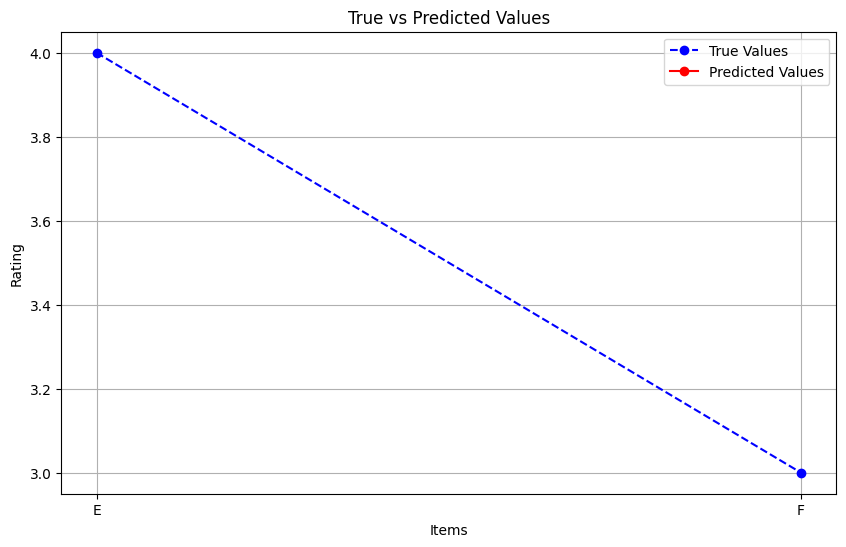

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 1. 파일 읽기 및 데이터 로딩
file_path = 'kim.txt'
data = []

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(',')
        user, item, rating = parts[0], parts[1], parts[2]
        if rating == '':
            rating = np.nan
        else:
            rating = float(rating)
        data.append((user, item, rating))

# 데이터프레임으로 변환
df = pd.DataFrame(data, columns=['User', 'Item', 'Rating'])
df_pivot = df.pivot(index='User', columns='Item', values='Rating')

# 결측값을 각 열의 평균으로 채우기
df_filled = df_pivot.apply(lambda col: col.fillna(col.mean()), axis=0)

# 코사인 유사도 계산
cos_sim = cosine_similarity(df_filled)
cos_sim_df = pd.DataFrame(cos_sim, index=df_filled.index, columns=df_filled.index)

# KNN 설정
k = 2
neigh = NearestNeighbors(n_neighbors=k, metric='cosine')
neigh.fit(df_filled)
distances, indices = neigh.kneighbors(df_filled)

# Kim에게 추천 계산
kim_index = df_filled.index.get_loc('kim')
neighbors_indices = indices[kim_index]

# 결측값에 대한 가중 평균 계산
recommendations = {}
for item in ['E', 'F']:
    if pd.isna(df_filled.loc['kim', item]):  # 결측값이 있는 항목만 추천
        item_index = df_filled.columns.get_loc(item)
        weighted_sum = 0
        similarity_sum = 0
        for neighbor_index in neighbors_indices:
            if not np.isnan(df_filled.iloc[neighbor_index, item_index]):
                similarity = 1 - distances[kim_index][list(indices[kim_index]).index(neighbor_index)]  # 코사인 거리 -> 유사도로 변환
                rating = df_filled.iloc[neighbor_index, item_index]
                weighted_sum += similarity * rating
                similarity_sum += similarity
        if similarity_sum != 0:
            recommendations[item] = weighted_sum / similarity_sum

# MSE 및 RMSE 계산
true_values = [4, 3]  # Kim의 E와 F의 실제 값 (임의로 설정된 값)
pred_values = [recommendations.get('E', np.nan), recommendations.get('F', np.nan)]

if not pd.isna(pred_values).all():
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)
else:
    mse = rmse = np.nan

# 결과 출력
print("코사인 유사도 매트릭스:")
print(cos_sim_df)

print("\nKim에 대한 추천:")
for item, recommendation in recommendations.items():
    print(f"Item {item}: {recommendation:.2f}")

print(f"\nMSE: {mse:.2f}, RMSE: {rmse:.2f}")

# MSE와 RMSE 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(['E', 'F'], true_values, label='True Values', marker='o', linestyle='--', color='blue')
plt.plot(['E', 'F'], pred_values, label='Predicted Values', marker='o', linestyle='-', color='red')

plt.title('True vs Predicted Values')
plt.xlabel('Items')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()
